# Exploratory and Statistical Data Analysis for Iced company

## 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math

### Lectura de datos y búsqueda de duplicados.

In [3]:
data = pd.read_csv('../databases/games.csv')
data.columns = data.columns.str.lower()
print(data.info())

# Búsqueda de duplicados:
print('Duplicados: ',data.duplicated().sum())

data[data['name']=='Rayman Arena']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Duplicados:  0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3343,Rayman Arena,PS2,2001.0,Racing,0.29,0.23,0.0,0.08,63.0,8.6,E
9230,Rayman Arena,GC,2002.0,Racing,0.11,0.03,0.0,0.00,60.0,7.2,E
12217,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.0,0.00,50.0,tbd,E


### Conversión de tipos de datos:

In [4]:
## CAMBIAMOS EL TIPO DE DATO DE LA COLUMNA user_score ------------------
#data['user_score'] = pd.to_numeric(data['user_score']) 
# En la coluna user_score tenemos datos no nulos, nulos y 'tbd'. Los nulos pueden provenir quizás de una mala captura de datos, o bien, aún no se han generado opiniones de los usuarios. Los 'tbd' sugieren tal vez actualizaciones en el score y este numero se este actualizando en la base de datos.
# Analizamos la naturaleza de los datos para los valores -tbd- en user_score
    #display(data[data['user_score']=='tbd']['genre'].value_counts()) # Los tbd pertenecen a generos variados. no hay una clara mayoría
    #display(data[data['user_score']=='tbd']['platform'].value_counts()) # tambien pertenecen a múltiples plataformas, no hay una clara mayoría
    #display(data[data['user_score']=='tbd']['name'].value_counts()) # tampoco hay una clara mayoría en algun juego 
    #display(data[data['user_score']=='tbd']['rating'].value_counts()) # en rating, el 66% pertenecen a la clasificación E
    #display(data[data['rating']=='E'])
# Como los valores tbd no aportan información y no hay forma de averiguar estos valores, se forzará el cambio de 'tbd' a valores numéricos y se transformarán a NaN:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 



### Manejo de valores ausentes:

In [9]:
# COLUMNA 'name': 
print('_'*20, 'Eliminamos los datos con valores ausentes en la columna "name":')
# Tenemos solo 2 valores ausentes:
    #display(data[data['name'].isna()])
# Eliminamos estas 2 filas del DF, dado que tiene mucha información NaN y no aporta mucho al DF:
if len(data[data['name'].isna()]) != 0:
    data = data.drop([659,14244], axis=0).reset_index(drop=True)
else:
    print("The column 'name' has no null values anymore")
display(data.info())

# COLUMNA 'year_of_release':
print('_'*20, 'Llenamos los valores ausentes en la columna "year_of_release" con la info del nombe del juego:')
# analizamos los datos ausentes para esta columna:
    #df_prueba = data[data['year_of_release'].isna()]
    #df_prueba = data[data['year_of_release'].isna()]
    #display(df_prueba)
# vemos que en algunos casos el año de lanzamiento está implicito en el nombre del juego. Para estos casos, verificamos si el nombre tiene el año de lanzamiento, si lo tiene, copiamos el año (transformado en float) a la columna 'year_of_release:
# Definimos una función para extraer el año de 'name' usando expresiones regulares:
def extract_year(dataframe):
    match = re.search(r'\b(\d{4})\b', dataframe['name'])
    return float(match.group(1)) if match else dataframe['year_of_release']

years = data.apply(extract_year, axis=1) # Se extrae el año del nombre
data['year_of_release'] = data['year_of_release'].fillna(years) # Llenamos los valores ausentes hallados
print(data.info())

print('_'*20, 'Llenamos los valores ausentes "year_of_release" para los juegos multiplataforma:')
    #df_prueba = data[data['year_of_release'].isna()]
    #display(df_prueba) # Vemos que aún hay valores ausentes, como por ejemplo: LEGO Batman: The Videogame
# Corroboremos que no hay otras instancias del mismo juego que sí tengan año de lanzamiento. En caso de haber, debemos asignar ese año a los valores ausentes de 'year_of_release' de ese juego:
    #display(data[data['name']=='LEGO Batman: The Videogame'])
# Con lo anterior corroboramos que puede haber juegos repetidos para multiples plataformas, pero que en algunas de ellas no está definido el año de lanzamiento. Usaremos entonces, las plataformas que sí tienen año de lanzaminto definido para asignarle el año a aquellos juegos que no lo tengan.
lista_juegos = data.groupby('name')['year_of_release'].median().round() #Usamos la mediana para obtener el valor común
data['year_of_release'] = data.set_index('name')['year_of_release'].fillna(lista_juegos).reset_index(drop=True)
#display(data)
display(data.info())

____________________ Eliminamos los datos con valores ausentes en la columna "name":
The column 'name' has no null values anymore
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

____________________ Llenamos los valores ausentes en la columna "year_of_release" con la info del nombe del juego:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None
____________________ Llenamos los valores ausentes "year_of_release" para los juegos multiplataforma:
2002.0
<class 'pan

None

Después de este procedimiento, siguen quedando aún 139 juegos con valor ausente en"year_of_release", sin embargo, ya no es posible aveiguar los valores ausentes con la información disponible en el DF

### Calculo de las ventas totales

In [10]:
# Cálculo de las ventas totales:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## 2. Data Analysis
#### How many games were released in different years?

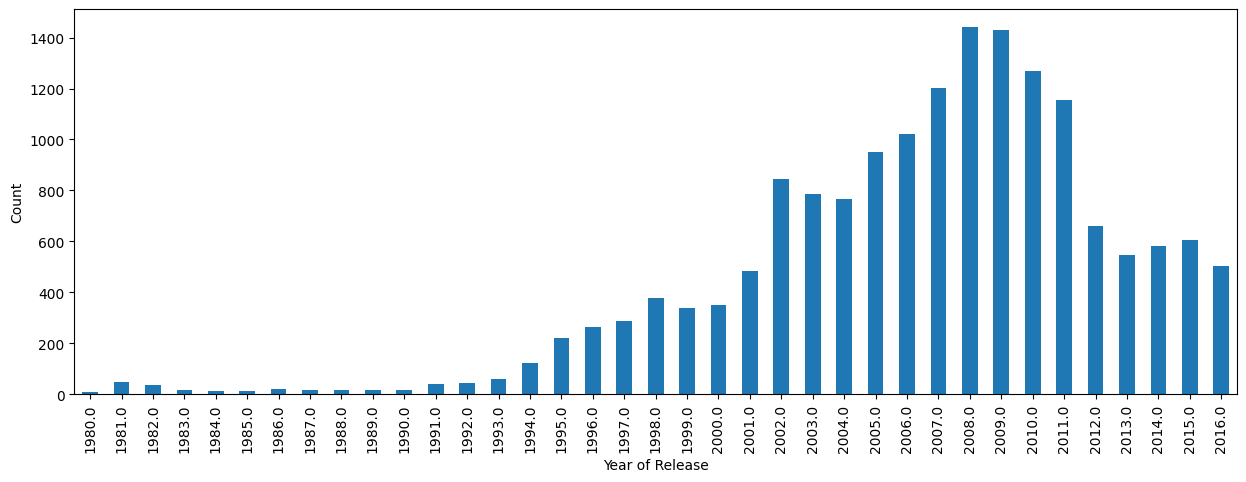

In [12]:
games_by_year = data.groupby('year_of_release')['name'].count()
#display(games_by_year)
plt.figure(1, figsize=(15,5))
games_by_year.plot(kind='bar', xlabel='Year of Release', ylabel='Count')
plt.show()

It can be seen that the difference in games released is quite different in each year, with 2008 and 2009 being the years where the most video games were launched.

#### How sales vary from one platform to another?

In [ ]:
top_platform_sales = data.groupby(['year_of_release','platform'])['total_sales'].sum()
display(top_platform_sales['2016'])
display(type(top_platform_sales))

In [ ]:
data[(data['platform']=='PSV') & (data['year_of_release']=='2016')]['total_sales'].sum()

In [ ]:
pd.Series([1,2,3,np.nan]).max()